## Observations and Insights 

In [1]:
%load_ext lab_black

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_complete = pd.merge(
    mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"]
)

# Display the data table for preview
mouse_study_data_complete.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [3]:
df = mouse_study_data_complete
df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

#### Checking the number of mice.

In [4]:
mouse_count = df["Mouse ID"].value_counts().sum()
mouse_count

1893

old = df
new = old[["Mouse ID", "Timepoint"]].copy()
new

#### Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [5]:
df[df.duplicated(["Mouse ID", "Timepoint"])].value_counts().sum()

5

In [6]:
# Optional: Get all the data for the duplicate mouse ID.

#### Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [7]:
df = df.drop_duplicates(["Mouse ID", "Timepoint"])

#### Checking the number of mice in the clean DataFrame.

In [8]:
df["Mouse ID"].value_counts().sum()

1888

## Summary Statistics

#### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

##### (This method is the most straighforward, creating multiple series and putting them all together at the end.)

In [9]:
drug_regimen_mean = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

In [10]:
drug_regimen_median = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

In [11]:
drug_regimen_var = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

In [12]:
drug_regimen_std = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

In [13]:
drug_regimen_sem = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [14]:
sum_stat_df = pd.DataFrame()
sum_stat_df["Mean Tumor Vol"] = drug_regimen_mean
sum_stat_df["Median Tumor Vol"] = drug_regimen_median
sum_stat_df["Variance"] = drug_regimen_var
sum_stat_df["Standard Deviation"] = drug_regimen_std
sum_stat_df["Standard Error of of Mean"] = drug_regimen_sem
sum_stat_df

,Mean Tumor Vol,Median Tumor Vol,Variance,Standard Deviation,Standard Error of of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


#### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

##### (This method produces everything in a single groupby function)

In [15]:
sum_stat_df2 = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"]
)
sum_stat_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

#### Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

##### Creating a dataframe that groups the data by "Drug Regimen" and counts the unique "Mouse IDs"

In [16]:
drug_regimen_mice_count_df = df.groupby(["Drug Regimen"], as_index=False)[
    "Mouse ID"
].nunique()
drug_regimen_mice_count_df.rename(columns={"Mouse ID": "# of Mice"}, inplace=True)
drug_regimen_mice_count_df

,Drug Regimen,# of Mice
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,25
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


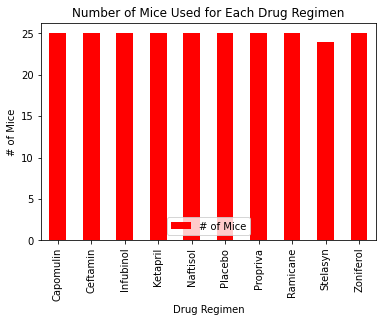

In [17]:
drug_regimen_mice_count_df.plot(
    x="Drug Regimen",
    y="# of Mice",
    kind="bar",
    xlabel="Drug Regimen",
    ylabel="# of Mice",
    color="red",
    title="Number of Mice Used for Each Drug Regimen",
)
plt.show()

#### Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

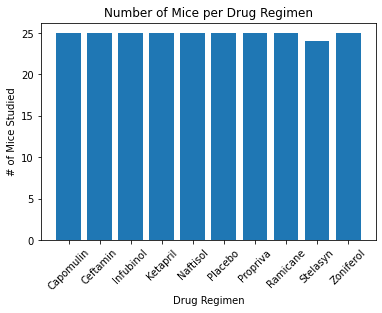

In [18]:
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Studied")
plt.bar(
    drug_regimen_mice_count_df["Drug Regimen"], drug_regimen_mice_count_df["# of Mice"]
)
plt.xticks(rotation=45)
plt.show()

#### Generate a pie plot showing the distribution of female versus male mice using pandas

##### Creating a group to show the number of male and female mice by their ids

In [19]:
male_female_df = df.groupby(["Sex"], as_index=False)["Mouse ID"].count()
male_female_df.rename(columns={"Mouse ID": "Mice Gender"}, inplace=True)
male_female_df

,Sex,Mice Gender
0,Female,930
1,Male,958


<function matplotlib.pyplot.show(close=None, block=None)>

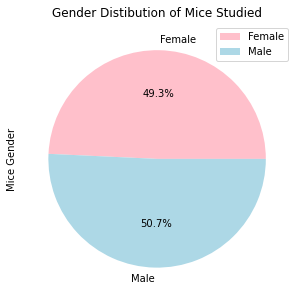

In [20]:
male_female_df.plot.pie(
    y="Mice Gender",
    labels=["Female", "Male"],
    colors=["pink", "lightblue"],
    autopct="%1.1f%%",
    figsize=(5, 5),
)
plt.title("Gender Distibution of Mice Studied")
plt.show

#### Generate a pie plot showing the distribution of female versus male mice using pyplot

<function matplotlib.pyplot.show(close=None, block=None)>

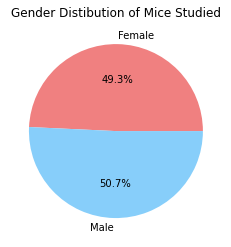

In [21]:
plt.pie(
    x=male_female_df["Mice Gender"],
    labels=["Female", "Male"],
    colors=["lightcoral", "lightskyblue"],
    autopct="%1.1f%%",
)
plt.title("Gender Distibution of Mice Studied")
plt.show

## Quartiles, Outliers and Boxplots

#### Calculate the final tumor volume of each mouse across four of the treatment regimens:  
##### (Capomulin, Ramicane, Infubinol, and Ceftamin)

In [22]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset

In [23]:
max_timepoint_df = df.loc[df.groupby("Mouse ID")["Timepoint"].idxmax()]
max_timepoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1


In [24]:
capomulin_df = max_timepoint_df.loc[max_timepoint_df["Drug Regimen"] == "Capomulin"]
ramicane_df = max_timepoint_df.loc[max_timepoint_df["Drug Regimen"] == "Ramicane"]
infubinol_df = max_timepoint_df.loc[max_timepoint_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = max_timepoint_df.loc[max_timepoint_df["Drug Regimen"] == "Ceftamin"]

In [25]:
frames = [capomulin_df, ramicane_df, infubinol_df, ceftamin_df]
final_tumor_caraince_df = pd.concat(frames)
final_tumor_caraince_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


#### Put treatments into a list for for loop (and later for plot labels)

In [37]:
list_of_treatments = final_tumor_caraince_df["Drug Regimen"].values.tolist()

#### Create empty list to fill with tumor vol data (for plotting)

In [27]:
tumor_vol_list = []

#### Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [28]:
columns = ["Drug Regimen", "Tumor Volume (mm3)"]
q1_df = final_tumor_caraince_df.groupby("Drug Regimen").quantile(0.25)
q1_df.drop(
    ["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1, inplace=True
)

In [29]:
columns = ["Drug Regimen", "Tumor Volume (mm3)"]
q3_df = final_tumor_caraince_df.groupby("Drug Regimen").quantile(0.75)
q3_df.drop(
    ["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1, inplace=True
)

In [30]:
outliers_df = pd.merge(q1_df, q3_df, how="outer", on=["Drug Regimen"])
outliers_df.rename(
    columns={
        "Tumor Volume (mm3)_x": "Tumor Volume (mm3)P1",
        "Tumor Volume (mm3)_y": "Tumor Volume (mm3)P3",
    },
    inplace=True,
)
outliers_df

,Tumor Volume (mm3)P1,Tumor Volume (mm3)P3
Drug Regimen,,
Capomulin,32.377357,40.159220
Ceftamin,48.722078,64.299830
Infubinol,54.048608,65.525743
Ramicane,31.560470,40.659006


#### Determine outliers using upper and lower bounds

In [31]:
iqr = outliers_df["Tumor Volume (mm3)P3"] - outliers_df["Tumor Volume (mm3)P1"]
iqr
outliers_df["IQR"] = iqr
lower_range = outliers_df["Tumor Volume (mm3)P1"] - (1.5 * iqr)
upper_range = outliers_df["Tumor Volume (mm3)P3"] + (1.5 * iqr)
outliers_df["Lower Range"] = lower_range
outliers_df["Upper Range"] = upper_range
outliers_df

,Tumor Volume (mm3)P1,Tumor Volume (mm3)P3,IQR,Lower Range,Upper Range
Drug Regimen,,,,,
Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458
Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811


In [32]:
df_outliers = pd.merge(
    final_tumor_caraince_df, outliers_df, how="outer", on=["Drug Regimen"]
)
df_outliers.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)P1,Tumor Volume (mm3)P3,IQR,Lower Range,Upper Range
0,b128,Capomulin,Female,9,22,45,38.982878,2,32.377357,40.15922,7.781863,20.704562,51.832015
1,b742,Capomulin,Male,7,21,45,38.939633,0,32.377357,40.15922,7.781863,20.704562,51.832015
2,f966,Capomulin,Male,16,17,20,30.485985,0,32.377357,40.15922,7.781863,20.704562,51.832015
3,g288,Capomulin,Male,3,19,45,37.074024,1,32.377357,40.15922,7.781863,20.704562,51.832015
4,g316,Capomulin,Female,22,22,45,40.159220,2,32.377357,40.15922,7.781863,20.704562,51.832015


In [33]:
outliers_low = df_outliers.loc[
    df_outliers["Tumor Volume (mm3)"] < df_outliers["Lower Range"]
]
outliers_low

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)P1,Tumor Volume (mm3)P3,IQR,Lower Range,Upper Range
55,c326,Infubinol,Female,18,25,5,36.321346,0,54.048608,65.525743,11.477135,36.832905,82.741446


In [34]:
outliers_high = df_outliers.loc[
    df_outliers["Tumor Volume (mm3)"] > df_outliers["Upper Range"]
]
outliers_high

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)P1,Tumor Volume (mm3)P3,IQR,Lower Range,Upper Range


In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

<function matplotlib.pyplot.show(close=None, block=None)>

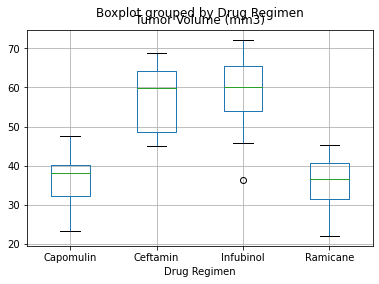

In [42]:
df_outliers.boxplot(by="Drug Regimen", column="Tumor Volume (mm3)")
plt.show

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
capomulin_df2 = df.loc[df["Drug Regimen"] == "Capomulin"]
s185_df = capomulin_df2.loc[capomulin_df2["Mouse ID"] == "s185"]
s185_df

In [ ]:
plt.title("Tumor Volume over Time (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(s185_df["Timepoint"], s185_df["Tumor Volume (mm3)"])
plt.grid()
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


In [ ]:
plt.scatter(capomulin_df2["Weight (g)"], capomulin_df2["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
